# Food 101 Model készítése #

## Load and prepare data ##

In [1]:
#!pip install -Uqq fastai 
from fastai.vision.all import *

In [2]:
foodPath = untar_data(URLs.FOOD)

In [3]:
get_files(foodPath)

(#101017) [Path('C:/Users/mauzi/.fastai/data/food-101/classes.txt'),Path('C:/Users/mauzi/.fastai/data/food-101/labels.txt'),Path('C:/Users/mauzi/.fastai/data/food-101/test.json'),Path('C:/Users/mauzi/.fastai/data/food-101/test.txt'),Path('C:/Users/mauzi/.fastai/data/food-101/train.json'),Path('C:/Users/mauzi/.fastai/data/food-101/train.txt'),Path('C:/Users/mauzi/.fastai/data/food-101/h5/food_c101_n1000_r384x384x3.h5'),Path('C:/Users/mauzi/.fastai/data/food-101/h5/food_c101_n10099_r32x32x1.h5'),Path('C:/Users/mauzi/.fastai/data/food-101/h5/food_c101_n10099_r32x32x3.h5'),Path('C:/Users/mauzi/.fastai/data/food-101/h5/food_c101_n10099_r64x64x1.h5')...]

In [4]:
len(get_image_files(foodPath))

101000

In [5]:
pd.read_json('C:/Users/mauzi/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


In [14]:
#48 kategoria
categories = ['apple_pie', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'carrot_cake', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'club_sandwich', 'creme_brulee', 'cup_cakes', 'donuts', 'fish_and_chips', 'french_fries', 'french_onion_soup', 'french_toast', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'grilled_cheese_sandwich', 'grilled_salmon', 'hamburger', 'hot_dog', 'ice_cream', 'lasagna', 'macaroni_and_cheese', 'macarons', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pancakes', 'panna_cotta', 'pizza', 'risotto', 'spaghetti_bolognese', 'spaghetti_carbonara', 'steak', 'sushi', 'tacos', 'tiramisu', 'waffles']

for img in get_image_files(foodPath):
    for category in categories:
        if category in str(img):
            img.rename(f"{img.parent}/{category}-{img.name}")
            break
    else:
        os.remove(img)
    

len(get_image_files(foodPath))

48000

## Training ##

In [15]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("apple_pie-apple_pie-apple_pie-apple_pie-101251")

'apple_pie'

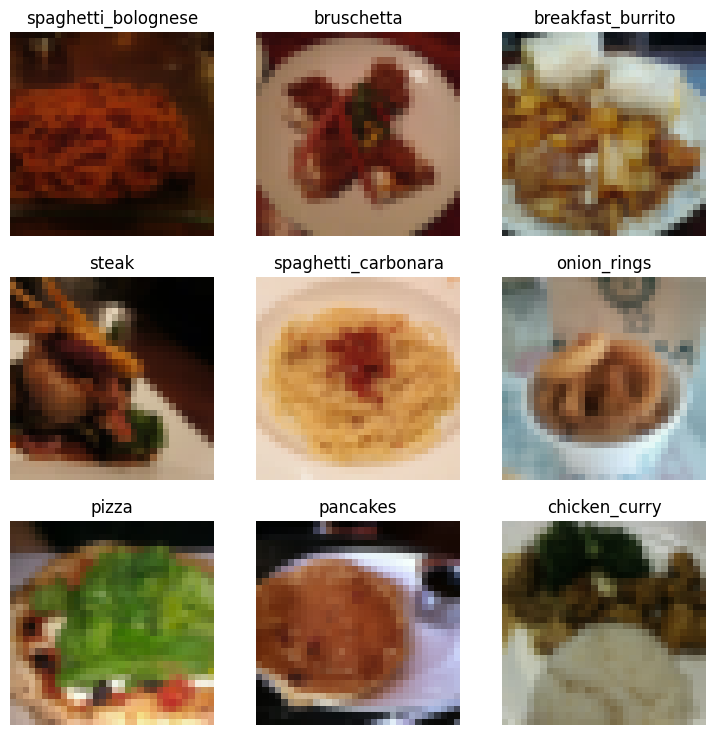

In [17]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(32))

dls.train.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=1)

## Verify model with local images ##

In [ ]:
from fastai.vision.all import *

local_image_path = '../test_images/stek.jpg'

img = PILImage.create(local_image_path)
img.show()

label, _, probs = learn.predict(img)

print(f"This is a {label}.")

## Test using images from dataset ##

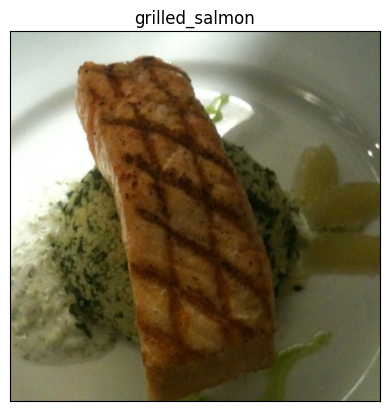

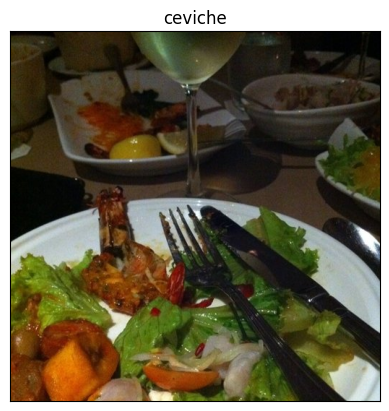

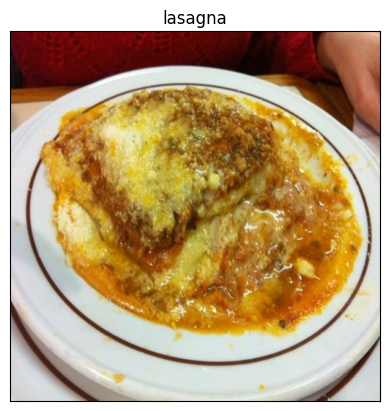

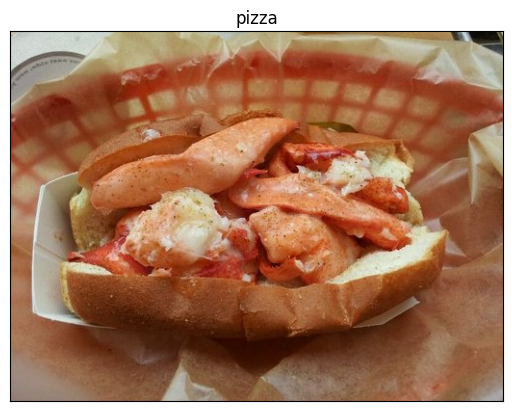

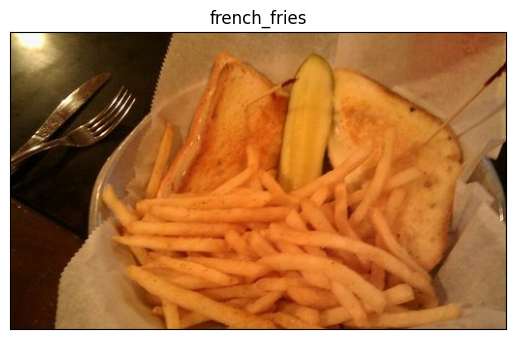

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,5):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

## Predictions ##

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(6)

## Deploy ##

In [14]:
learn.export()

In [15]:
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('C:/Users/mauzi/.fastai/data/food-101/export.pkl')

In [16]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

('cannoli',
 tensor(12),
 tensor([1.7702e-01, 8.9359e-05, 2.0166e-01, 1.5600e-05, 1.5737e-04, 1.1218e-05,
         1.7243e-04, 8.3744e-06, 7.9993e-04, 3.6746e-03, 4.3523e-05, 2.8272e-05,
         5.1622e-01, 3.9177e-05, 6.7454e-02, 3.4869e-05, 6.2649e-05, 4.3305e-03,
         1.4096e-04, 4.2715e-04, 3.4563e-05, 1.9465e-03, 8.4963e-04, 1.4536e-03,
         3.3094e-05, 1.0313e-04, 3.1351e-05, 1.8465e-05, 3.1275e-05, 7.1244e-05,
         1.8849e-05, 1.7774e-04, 3.9097e-05, 7.4261e-06, 6.2271e-06, 2.5742e-05,
         1.5492e-04, 4.5192e-05, 8.5041e-05, 5.5184e-03, 2.4399e-04, 6.4563e-06,
         3.0423e-04, 9.4750e-06, 9.6647e-04, 1.7071e-05, 2.5447e-03, 2.7506e-04,
         2.8324e-05, 8.5793e-04, 1.0619e-03, 1.3933e-05, 1.5525e-04, 1.1004e-05,
         1.2497e-05, 3.7099e-04, 3.0347e-05, 7.4782e-05, 3.6280e-04, 3.2797e-04,
         6.1053e-05, 1.7059e-04, 5.0047e-05, 9.0866e-05, 3.5893e-06, 2.0061e-04,
         1.8138e-05, 1.6207e-04, 1.4759e-05, 4.4161e-05, 1.1546e-04, 3.6364e-05,
   

In [17]:
learn_inf.dls.vocab #Get the labels

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou